# Machine Learning Demonstrations

In this notebook, we showcase how to use the kdb+/q clustering library, contained within the ML-Toolkit, and to plot outputs using embedPy. Below we demonstrate how to use each algorithm contained within the toolkit and how to use the library in conjunction with real-world data.

<div class="alert alert-danger">
To run the below notebook, ensure that dependencies specified in <b>requirements.txt</b> have been correctly installed.
</div>

# Clustering

Clustering is a technique used in both data mining and machine learning to group similar data points together in order to identify patterns in their distributions.

The task of clustering data can be carried out using a number of algorithms. The algorithms defined in the toolkit work based on distinct clustering methodologies namely; connectivity-based, centroid-based or density-based models. Each type of algorithm defines clusters based on:

-   **Centroid-based** - distances from single points which represent the cluster.
-   **Density-based** - clusters being within a certain distance of each other and in defined concentrations.
-   **Connectivity-based** - distances between individual data points.

Each algorithm works by iteratively joining, separating or reassigning points until the desired number of clusters have been achieved.

The process of finding the correct cluster for each data point is a case of trial and error, where parameters must be altered in order to find the optimum solution.

## Machine Learning Toolkit

The ML-Toolkit contains general use utilities, an implementation of the FRESH (Feature Extraction based on Scalable Hypothesis tests) algorithm, cross validation functions and clustering algorithms. The primary purpose of these libraries are to provide kdb+/q users with access to commonly-used ML functions for preprocessing data, extracting features and scoring results.

The clustering library contained within the toolkit is used throughout this notebook and can be loaded using the below syntax.

In [1]:
\l ml/ml.q
.ml.loadfile`:clust/init.q

## Sections

This notebook is split into 2 distinct sections, which cover the different algorithms contained in the toolkit, along with a real-world example.

[**Algorithms**](#Algorithms):
1. Centroid-based: [K-Means](#K-Means)
2. Density-based: [DBSCAN](#DBSCAN), [Affinity Propagation](#Affinity-Propagation)
3. Connectivity-based: [Hierarchical](#Hierarchical), [CURE](#CURE)

**Real-World Example**:
4. [Chocolate Bar Ratings](#Chocolate-Bar-Ratings)

---

## Load scripts and import functions

Throughout this notebook, we cluster data from the `sklearn` sample library along with clusters created using q and then visualize the results using `matplotlib`. A scipy funtion has also been imported to plot hierarchical dendrograms.

Each of the libraries are imported using embedPy, as shown below.

In [2]:
// import matplotlib from Python
plt:.p.import`matplotlib.pyplot

// dendrogram plot
dgramplt:.p.import[`scipy.cluster][`:hierarchy]`:dendrogram

// sklearn samples
skldata:.p.import`sklearn.datasets
blobs:skldata[`:make_blobs;<]
moons:skldata[`:make_moons;<]

---

<a id='Affinity-Propagation'></a>
# Algorithms

In this section we showcase how to use the algorithms contained within the ML-Toolkit. We start with descriptions of centroid and density-based clustering algorithms, followed by connectivity-based algorithms.

Each algorithm has both fit and predict methods, with additional update methods provided for K-Means and DBSCAN.

Before continuing through the notebook, it is worth noting that for simplicity the algorithms below have been applied to 2D datasets with 1000 points in each. All algorithms can be applied in higher dimensional examples.

---

<a id='K-Means'></a>
## K-Means

Clustering data with the k-means algorithm begins with the selection of *k* data points as cluster centres. Data points are then assigned to the nearest cluster centres.

The algorithm follows an iterative refinement process which will run *n* times, updating the cluster centres and assigned points during each iteration.

Advantages of k-means include:
- The simplicity of the algorithm, both to implement and run, makes it extremely efficient and easy to understand
- Creating centroids is an easy way to perform data reduction

### `.ml.clust.kmeans.fit`

To apply k-means to q data, the function `.ml.clust.kmeans.fit[data;df;k;iter;kpp]` must be called where:
- `data` represents the points being analyzed in matrix format, where each column is an individual data point
- `df` is the distance function: ``` `e2dist`edist```
- `k` is the number of clusters
- `iter` is the number of iterations to be completed
- `kpp` is a boolean flag indicating the initializaton type: k random points (`0b`) or using the [k-means++](https://en.wikipedia.org/wiki/K-means%2B%2B) algorithm (`1b`)

The function returns a dictionary with data, input variables, representative points required for predict/update methods and the cluster each data point belongs to.

In this example, we show how k-means can be used to identify clusters in datasets with no apparent structure.

The algorithm is able to cluster the data into evenly spaced clusters in comparison to other denisty or distance based algorithms.

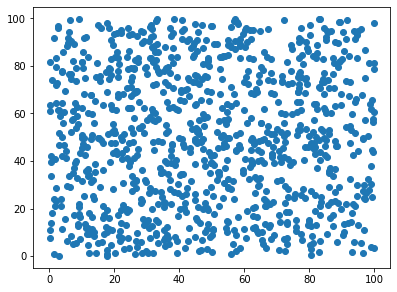

In [3]:
\S 20
d1:2 1000#4000?100.
plt[`:scatter]. d1;
plt[`:show][];

In this case, we want to identify `3` clusters across `10` iterations of the algorithm using Euclidean squared distances. Note that in this case, k-means will be initialized using kmeans++.

reppts| (36.29085 21.44984;79.04542 54.92946;29.05512 74.74381)
clt   | 0 1 1 1 1 1 2 0 2 0 2 1 1 2 0 1 1 1 2 0 1 0 2 1 0 2 0 1 1 0 0 1 1 0 2..
data  | (17.81929 66.90388 72.43899 99.98528 76.75971 72.38224 18.36728 50.61..
inputs| `df`k`iter`kpp!(`e2dist;3;10;1b)


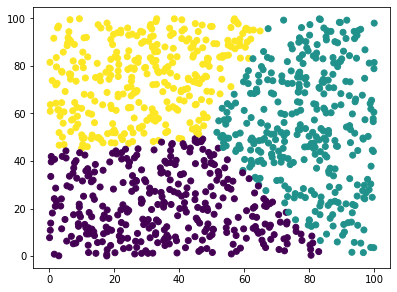

Time taken for K-Means: 00:00:00.003


In [4]:
start:.z.t
show r1:.ml.clust.kmeans.fit[d1;`e2dist;3;10;1b]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r1`clt]. d1;
plt[`:show][];
-1"Time taken for K-Means: ",end;

### `.ml.clust.kmeans.predict`

The function `.ml.clust.kmeans.predict[data;cfg]` provided within the toolkit allows us to predict the clusters of new data based on a previously fit k-means model. The inputs are as follows:
- `data` represents the points being analyzed in matrix format, where each column is an individual data point
- `cfg` represents a dictionary with data, input variables, representative points required for predict/update methods and the cluster each data point belongs to produced by `.ml.clust.kmeans.fit`

The function returns predicted clusters of new data.

In the example below, we generate 10 random data points. We will treat `d1` as our testing set and plot our new points in red with respect to the previous results.

62.33786 35.78808 80.40121 30.94639 0.9705018 94.35635 39.15378 82.99198 17.3..
82.45671 33.0495  35.41093 74.14622 5.253268  5.794548 92.5589  90.63745 19.1..


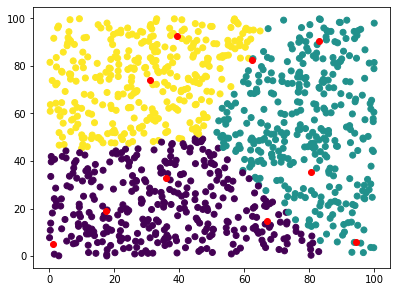

In [5]:
show d1tst:2 10#20?100.
plt[`:scatter][;;`c pykw r1`clt]. d1;
plt[`:scatter][;;`c pykw`r]. d1tst;
plt[`:show][];

Predicted clusters can then be generated as shown below.

1 0 1 2 0 1 2 1 0 0


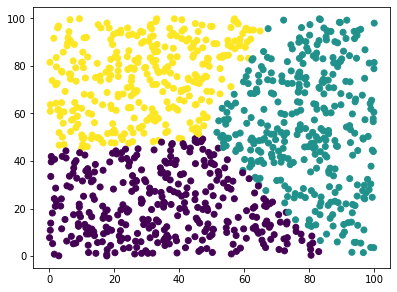

In [6]:
show r1pred:.ml.clust.kmeans.predict[d1tst;r1]
plt[`:scatter][;;`c pykw r1[`clt],r1pred]. d1,'d1tst;
plt[`:show][];

### `.ml.clust.kmeans.update`

If a user is required to update their model each time that new points are added, they can do so using `.ml.clust.kmeans.update[data;cfg]` which takes the same `data` and `cfg` parameters as the predict method.

Below we update our k-means model with the new testing data.

reppts| (35.61045 21.47952;78.9965 54.34237;29.26379 74.9155)
clt   | 0 1 1 1 1 1 2 0 2 0 2 1 1 2 0 1 1 1 2 0 1 0 2 1 0 2 0 1 1 0 0 1 1 0 2..
data  | (17.81929 66.90388 72.43899 99.98528 76.75971 72.38224 18.36728 50.61..
inputs| `df`k`iter`kpp!(`e2dist;3;10;1b)


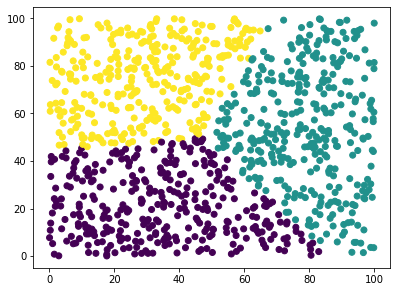

In [7]:
show r1upd:.ml.clust.kmeans.update[d1tst;r1]
plt[`:scatter][;;`c pykw r1upd`clt]. r1upd`data;
plt[`:show][];

---

<a id='DBSCAN'></a>
## DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

The DBSCAN algorithm groups points together that are closely packed in areas of high-density. Any points in low-density regions are seen as outliers.

DBSCAN does not require the user to pass in the number of clusters, it will determine the optimum number for you. This decision is based on a minimum number of points per cluster and an epsilon radius which describes the neighbourhood of each point, which must both be passed in as inputs.

Advantages of DBSCAN include:
- The number of clusters does not need to be known prior to use
- The algorithm is extremely useful for anomaly detection, and will return outliers as a separate cluster

### `.ml.clust.dbscan.fit`

To fit the DBSCAN algorithm to data, the function `.ml.clust.dbscan.fit[data;df;minpts;eps]` must be called where:
- `data` represents the points being analyzed in matrix format, where each column is an individual data point
- `df` is the distance function as a symbol: ``` `e2dist`edist`mdist```
- `minpts` is the minimum number of points required in a given neighborhood to define a cluster
- `eps` is the epsilon radius, the distance from each point within which points are defined as being in the same cluster

The function returns a dictionary with data, input variables, cluster table required for predict/update methods and the cluster each data point belongs to. Any outliers in the data will return a negative value as their cluster.

Below shows how DBSCAN can be used to cluster data in odd shapes, such a crescent moons.

Distance-based models would struggle to correctly classify datasets like the one below as clusters are in close proximity and so points could easily be included in the wrong cluster.

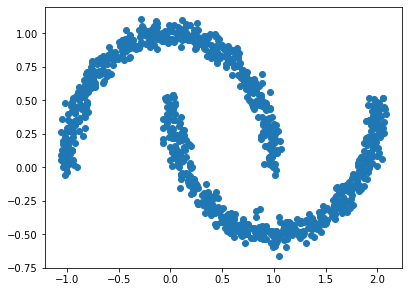

In [8]:
d2:flip moons[`n_samples pykw 1000;`noise pykw 0.05]0
plt[`:scatter]. d2;
plt[`:show][];

Density based models like DBSCAN are able to distinguish between the clusters given that points in each are densely packed.

Euclidean squared distances have been used for this example, with a minimum of `5` points required per cluster and a neighbourhood radius of `0.04`.

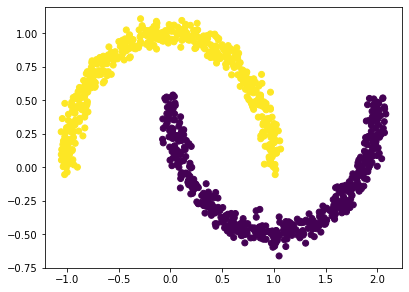

Time taken for DBSCAN: 00:00:00.019


In [9]:
start:.z.t
r2:.ml.clust.dbscan.fit[d2;`e2dist;5;.04]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r2`clt]. d2;
plt[`:show][];
-1"Time taken for DBSCAN: ",end;

### `.ml.clust.dbscan.predict`

Users can make predictions based on a previously fitted DBSCAN model using the function `.ml.clust.dbscan.predict[data;cfg]` which takes in new data points and the config dictionary returned from the fit function above.

Similarly to the example used for K-Means above, to demonstrate the DBSCAN predict functionality, we generate 10 random data points below.

1.799616  0.400143   -0.5335447 1.700981  1.424601   1.230637  0.7720531  0.1..
0.8484177 -0.4483083 -0.1252883 0.9041704 -0.1323369 0.5519073 -0.2811027 0.8..


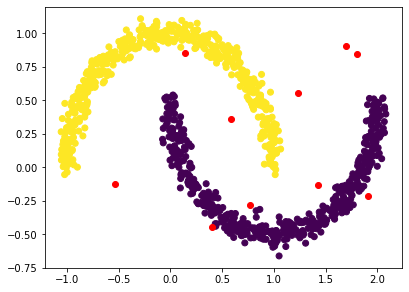

In [10]:
show d2tst:(-1+10?3.;-.5+10?1.5)
plt[`:scatter][;;`c pykw r2`clt]. d2;
plt[`:scatter][;;`c pykw`r]. d2tst;
plt[`:show][];

Clusters can then be predicted using the below.

-1 0 -1 -1 0 -1 0 1 -1 0


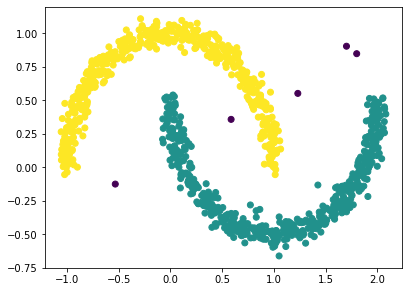

In [11]:
show r2pred:.ml.clust.dbscan.predict[d2tst;r2]
plt[`:scatter][;;`c pykw r2[`clt],r2pred]. d2,'d2tst;
plt[`:show][];

We see that a couple of the points have are represented in the current clusters, while the rest are marked as outliers.

### `.ml.clust.dbscan.update`

We can now update the clusters using `.ml.clust.dbscan.update[data;cfg]` passing in our testing data and config returned from fitting of the training set. An updated version of the config will then be returned with the updated clusters.

data  | (2.051786 0.8486965 0.05792083 0.06587403 -0.8245079 0.1805646 -0.074..
inputs| `df`minpts`eps!(`e2dist;5;0.04)
clt   | 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1..
t     | +`nbhood`cluster`corepoint!((26 29 54 152 226 240 268 357 402 458 468..


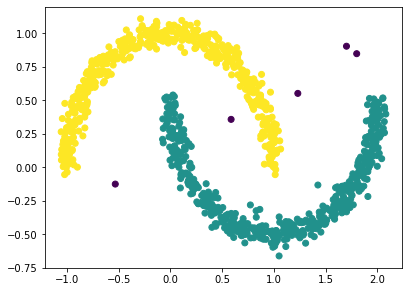

In [12]:
show r2upd:.ml.clust.dbscan.update[d2tst;r2]
plt[`:scatter][;;`c pykw r2upd`clt]. r2upd`data;
plt[`:show][];

---

<a id='Affinity-Propagation'></a>
## Affinity Propagation

The affinity propagation works by grouping data based on the similarity between points. It then finds *k* exemplars which best represent the points in each cluster.

Similarly to DBSCAN, the algorithm does not require the user to input the number of clusters and will determine the optimum solution by exchanging real-valued messages between points until a high-valued set of exemplars are produced.

A damping coefficient is used to reduce the availability and responsibility of messages passed between points, while the preference value is used to set the diagonal values of the similarity matrix.

Advantages of affinity propagration include:
- The number of clusters does not need to be known prior to use
- The algorithm is highly scalable and can be applied to large similarity matrices

### `.ml.clust.ap.fit`

We can apply the AP algorithm to our data using `.ml.clust.ap.fit[data;df;dmp;diag]` where:
- `data` represents the points being analyzed in matrix format, where each column is an individual datapoint
- `df` is the distance function as a symbol: `nege2dist` is recommended for this algorithm.
- `dmp` is the damping coefficient to be applied to the availability and responsibility matrices
- `diag` is the preference function for the diagonal of the similarity matrix (e.g. `min` `med` `max` etc.)
- `iter` is a dictionary containing the max allowed iterations and the max iterations without a change in clusters, with default values ``` `maxrun`maxmatch!200 50```. To use the defaults, pass in `(::)`.

As with the other algorithms above, the function returns a configuration dictionary with data, input variables and the cluster each data point belongs to, along with a list of exemplar points required for the predict method.

In the example below we create clusters using the `sklearn` samples library. There are 1000 points contained in the dataset and the random seed has been set so that results can be replicated.

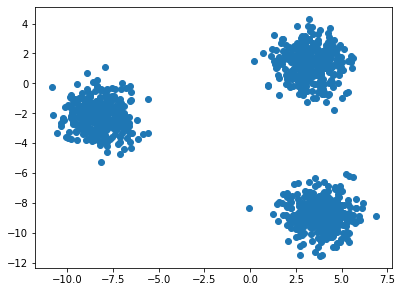

In [13]:
d3:flip blobs[`n_samples pykw 1000;`random_state pykw 500]0
plt[`:scatter]. d3;
plt[`:show][];

Below we demonstrate using the fit function to cluster the above dataset. In the example, `0.8` is passed as the damping coefficient, while `min` is used to calculate the diagonal of the similarity matrix.

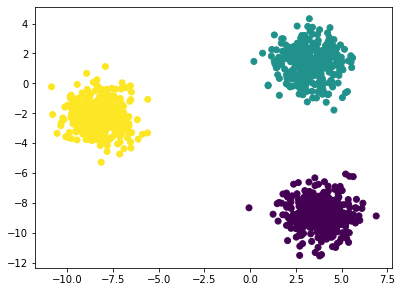

Time taken for Affinity Propagation: 00:00:02.344


In [14]:
start:.z.t
r3:.ml.clust.ap.fit[d3;`nege2dist;.8;min;(::)]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r3`clt]. d3;
plt[`:show][];
-1"Time taken for Affinity Propagation: ",end;

We can then demostrate how well the clusters have been selected by using the Davies Bouldin index, where the index has a minimum score of 0, with lower values indicating better clustering.

In [15]:
.ml.clust.daviesbouldin[d3;r3`clt]

0.2374849


### `.ml.clust.ap.predict`

Below we create a testing set with 10 random data points and predict clusters for each of the testing points using `.ml.clust.ap.predict`.

-0.2757825 4.023994  4.548925  7.409551  -5.829171 -5.221999 0.7561366 -6.683..
-8.857318  -1.280937 -11.73287 -3.908849 2.712459  -8.633746 -6.248374 -8.197..


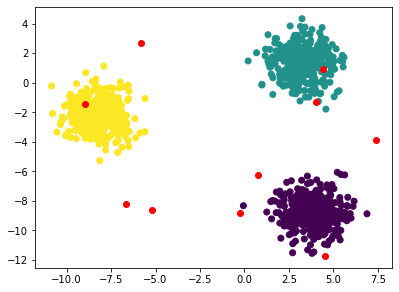

In [16]:
show d3tst:(-10+10?17.5;-12+10?16.)
plt[`:scatter][;;`c pykw r3`clt]. d3;
plt[`:scatter][;;`c pykw`r]. d3tst;
plt[`:show][];

0 1 0 0 2 2 0 2 2 1


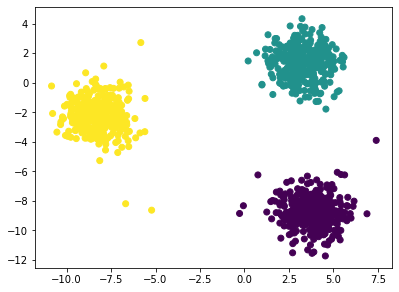

In [17]:
show r3pred:.ml.clust.ap.predict[d3tst;r3]
plt[`:scatter][;;`c pykw r3[`clt],r3pred]. d3,'d3tst;
plt[`:show][];

---

<a id='Hierarchical'></a>
## Hierarchical Clustering

As the name suggests, hierarchical clustering algorithms create hierarchies of clusters. The implementation described here follows an agglomerative approach, where each data point is initially treated as its own cluster.

There are 5 possible linkages in hierarchical clustering:
- Single
- Complete
- Average
- Centroid
- Ward

Euclidean, Euclidean squared or Manhattan distances can be used with each linkage, except for ward which only works with Euclidean squared distances and centroid which only works with Euclidean distances (both `e2dist` and `edist`).

In the implementation below, both q and C implementations of a k-dimensional (k-d) tree are available for the single and centroid implementations to store the representative points of each cluster (more information [here](https://code.kx.com/v2/ml/toolkit/clustering/kdtree)).

At each step, the two closest clusters (defined by the linkage) are merged until only one cluster remains, which contains all of the data points. Results are represented in a dendrogram, used to suggest the “appropriate” number of clusters in the data. 

Advantages of hierarchical clustering include:
- The algorithms can be used to produce a dendrogram structure, which is extremely informative compared to other algorithms.
- The different methods available within hierarchical clustering make it applicable to a wide range of datasets.

### `.ml.clust.hc.fit`

To run a hierarchical algorithm, `.ml.clust.hc.fit` is called which takes the following arguments:
- `data` represents the points being analyzed in matrix format, where each column is an individual datapoint
- `df` is the distance function as a symbol: ``` `e2dist`edist`mdist```
- `lf` is the linkage function as a symbol: ``` `single`complete`average`centroid`ward```

The function then returns a dictionary with data, input variables and a dendrogram table, describing the order in which clusters are joined, and the distance between the clusters as they are joined.

For simplicity, we only showcase some of the hierarchical linkages below.

The first example uses ward linkage with Euclidean squared distances. Blobs are generated as before, using the `sklearn` samples library. `200` datapoints are used and a random state is again chosen.

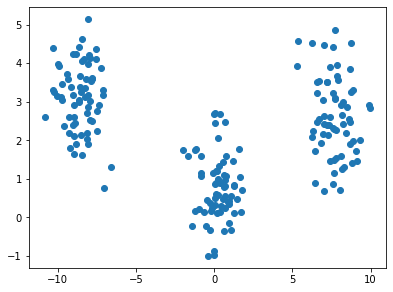

In [18]:
d4:flip blobs[`n_samples pykw 200;`random_state pykw 394]0
plt[`:scatter]. d4;
plt[`:show][];

In the first case, we demostrate how to use ward linkage in conjunction with Euclidean squared distances. We start by producing a dendrogram.

data  | (-9.273554 6.801422 1.100773 0.255346 -0.4738574 -9.165638 8.741494 0..
inputs| `df`lf!`e2dist`ward
dgram | +`i1`i2`dist`n!(113 94 67 40 8 31 102 15 153 26 76 49 51 56 68 11 90 ..


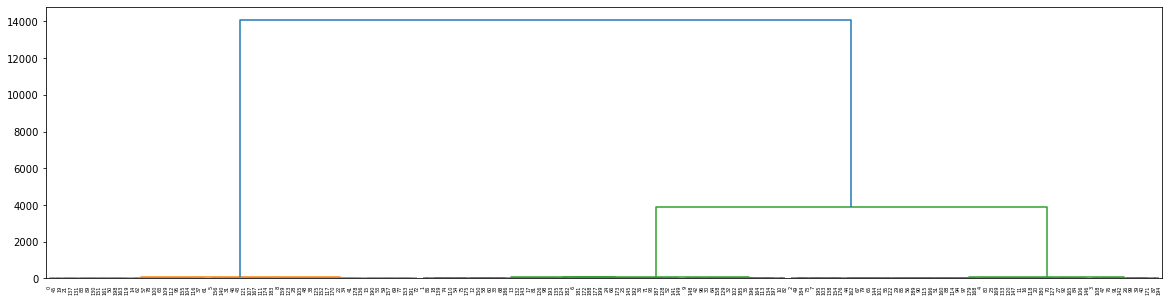

Time taken for Ward Linkage Hierarchical Dendrogram: 00:00:00.169


In [19]:
start:.z.t
show dendw:.ml.clust.hc.fit[d4;`e2dist;`ward]
end:string .z.t-start;
plt[`:figure][`figsize pykw 20 5];
dgramplt flip value flip dendw`dgram;
plt[`:show][];
-1"Time taken for Ward Linkage Hierarchical Dendrogram: ",end;

We can use the elbow method to decide how many clusters to group the data into.

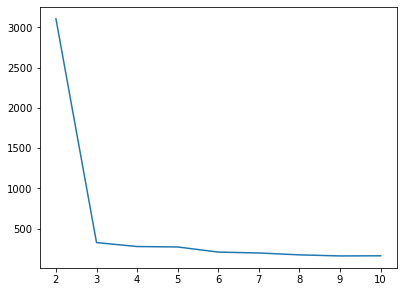

In [20]:
plt[`:plot][2+til 9;.ml.clust.elbow[d4;`e2dist;10]];
plt[`:show][];

We can see that, as expected, the elbow method suggests that the data should be grouped into 3 clusters.


We can cut the dendrogram using either `.ml.clust.hc.cutk` or `.ml.clust.hc.cutdist` to cut the dendrogram into a user defined number of clusters or at a user defined distance.

Below we use the `cutk` method and select 3 clusters.

data  | (-9.273554 6.801422 1.100773 0.255346 -0.4738574 -9.165638 8.741494 0..
inputs| `df`lf!`e2dist`ward
dgram | +`i1`i2`dist`n!(113 94 67 40 8 31 102 15 153 26 76 49 51 56 68 11 90 ..
clt   | 1 0 2 2 2 1 0 2 1 0 0 2 0 0 1 1 2 0 0 1 2 1 1 2 0 0 2 2 1 2 0 1 0 0 1..


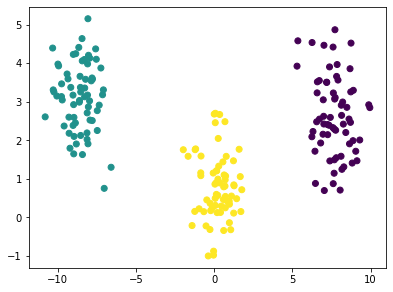

Time taken for Ward Linkage Hierarchical Clusters: 00:00:00.004


In [21]:
start:.z.t
show r4w:.ml.clust.hc.cutk[dendw;3]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r4w`clt]. d4;
plt[`:show][];
-1"Time taken for Ward Linkage Hierarchical Clusters: ",end;

In the second case, complete linkage is used in conjunction with manhattan distances.

data  | (-9.273554 6.801422 1.100773 0.255346 -0.4738574 -9.165638 8.741494 0..
inputs| `df`lf!`mdist`complete
dgram | +`i1`i2`dist`n!(113 94 67 40 31 8 102 26 15 49 76 153 56 84 51 68 11 ..


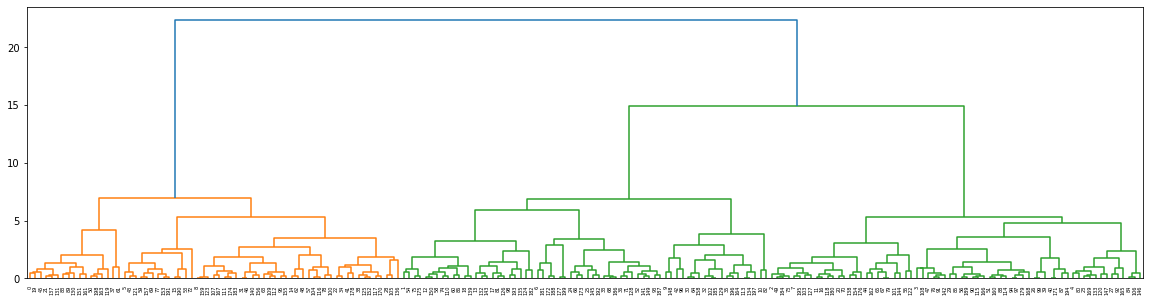

Time taken for Complete Linkage Hierarchical Dendrogram: 00:00:00.212


In [22]:
start:.z.t
show dendc:.ml.clust.hc.fit[d4;`mdist;`complete]
end:string .z.t-start;
plt[`:figure][`figsize pykw 20 5];
dgramplt flip value flip dendc`dgram;
plt[`:show][];
-1"Time taken for Complete Linkage Hierarchical Dendrogram: ",end;

data  | (-9.273554 6.801422 1.100773 0.255346 -0.4738574 -9.165638 8.741494 0..
inputs| `df`lf!`mdist`complete
dgram | +`i1`i2`dist`n!(113 94 67 40 31 8 102 26 15 49 76 153 56 84 51 68 11 ..
clt   | 1 0 2 2 2 1 0 2 1 0 0 2 0 0 1 1 2 0 0 1 2 1 1 2 0 0 2 2 1 2 0 1 0 0 1..


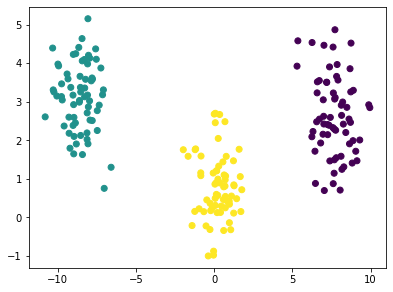

Time taken for Complete Linkage Hierarchical: 00:00:00.001


In [23]:
start:.z.t
show r4c:.ml.clust.hc.cutk[dendc;3]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r4c`clt]. d4;
plt[`:show][];
-1"Time taken for Complete Linkage Hierarchical: ",end;

We can then check how well the data has been clustered in both methods, with regards to their respective distance metrics, using the Silhouette coefficient.

In [24]:
// Ward linkage
.ml.clust.silhouette[d4;`e2dist;r4w`clt;1b]

// Complete linkage
.ml.clust.silhouette[d4;`mdist ;r4c`clt;1b]

0.9475706


0.7869327


### `.ml.clust.hc.predict`

Again it is possible to make predictions given our previously fitted hierarchical models.

Below we demonstrate how to make predictions for the ward model produced above, starting by generating 10 random points.

-7.910426 8.041406 3.023882  -7.336245 7.022235 1.322497 -5.303511 -4.246161 ..
1.038335  2.942607 -0.258896 0.2819804 2.769778 2.549553 2.573973  0.14142   ..


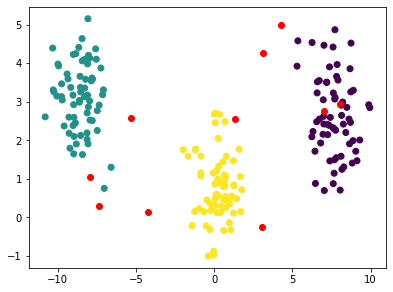

In [25]:
show d4tst:(-10+10?20.;-1+10?6.)
plt[`:scatter][;;`c pykw r4w`clt]. d4;
plt[`:scatter][;;`c pykw`r]. d4tst;
plt[`:show][];

1 0 2 1 0 2 1 2 0 2


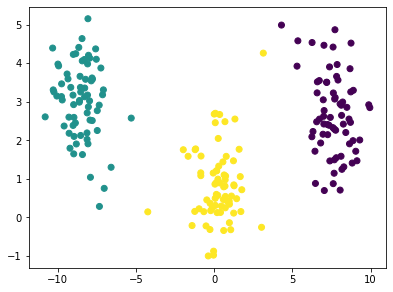

In [26]:
show r4pred:.ml.clust.hc.predict[d4tst;r4w]
plt[`:scatter][;;`c pykw r4w[`clt],r4pred]. d4,'d4tst;
plt[`:show][];

---

<a id='CURE'></a>
## CURE (Clustering Using REpresentatives)

CURE clustering is a distance-based technique used to deal with datasets containing outliers and clusters of varying sizes and shapes.

Each cluster is represented by a specified number of representative points, chosen by taking the the most scattered points in each cluster and compressing them towards the cluster centre by a fixed amount.

Similarly to Hierarchial, the q and C implementations of the k-d trees can be used.

Advantages of CURE include:
- The use of a k-dimensional tree make the algorithm extremely efficient and highly scalable.
- The use of compression allows CURE to perform well in cases where the dataset provided contains outliers or has clusters of varying sizes and shapes.

### `.ml.clust.cure.fit`

In the cell below we demonstrate how to cluster data using the CURE algorithm. `.ml.clust.cure` is called with the following arguments:
- `data` is the data points in a horizontal matrix format
- `df` is the distance function as a symbol: ``` `e2dist`edist`mdist ```
- `n` is the number of representative points
- `c` is the compression

Similarly to HC CURE's fit method returns a dictionary with data, input variables and a dendrogram table.

The below code creates a dataset of points belonging to 4 distinct clusters, 3 of which share the same centre. Most clustering algorithms do not perform well when presented with data in concentric circles. 

Note that the process has been random seeded so that results can be replicated.

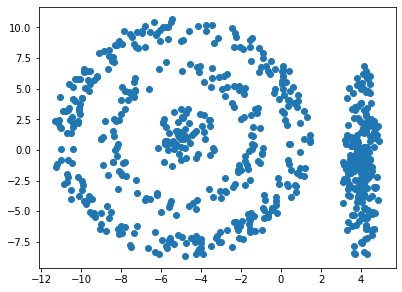

In [27]:
\S 20
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d5 :flip(-5 1)+(1 1.5)*dsc[1000; 0;1.8],'dsc[2000;3.1;4.2],'dsc[4000;5.2;6.5]
d5,:flip(4 -1)+(1 8)*dsc[4000; 0;1.]
d5@:neg[700&count d5]?count d5
plt[`:scatter]. d5:flip d5;
plt[`:show][];

By using representative points, CURE is able to perform well when applied to these kinds of datasets.

The below applies CURE to the dataset, using Euclidean squared distances, `50` representative points and `0` compression. Below we follow the same method as the hierarchical methods above, plotting the dendrogram first, followed by splitting into `4` clusters.

data  | (-8.99899 -1.844069 -1.717542 4.091333 -4.24146 -8.736581 4.872279 -5..
inputs| `df`n`c!(`e2dist;50;0)
dgram | +`i1`i2`dist`n!(227 261 406 40 701 224 186 441 115 57 152 160 120 268..


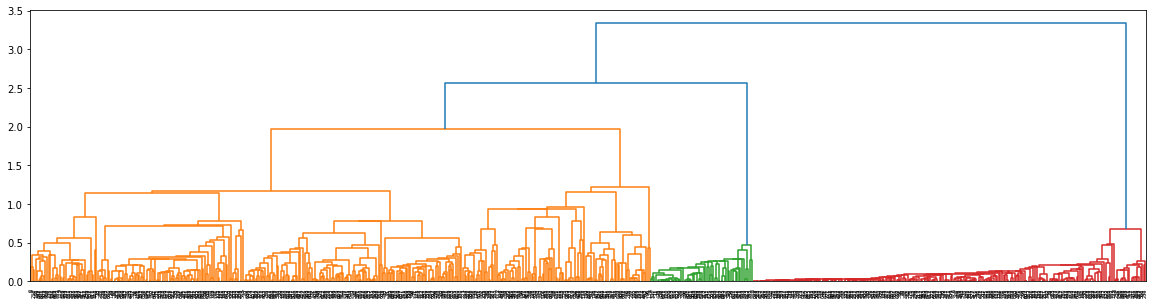

Time taken for CURE Dendrogram: 00:00:00.472


In [28]:
start:.z.t
show dendcure:.ml.clust.cure.fit[d5;`e2dist;50;0]
end:string .z.t-start;
plt[`:figure][`figsize pykw 20 5];
dgramplt flip value flip dendcure`dgram;
plt[`:show][];
-1"Time taken for CURE Dendrogram: ",end;

As with the hierarchical methods above, we can use `.ml.clust.cure.cutk` or `.ml.clust.cure.cutdist` to cut the dendrogram into a user defined number of clusters or at a user defined distance.

Below we use the `cutk` method to separate our data into 4 clusters.

data  | (-8.99899 -1.844069 -1.717542 4.091333 -4.24146 -8.736581 4.872279 -5..
inputs| `df`n`c!(`e2dist;50;0)
dgram | +`i1`i2`dist`n!(227 261 406 40 701 224 186 441 115 57 152 160 120 268..
clt   | 0 1 1 3 2 0 3 0 3 0 1 2 3 3 2 0 3 3 0 1 0 0 3 1 0 3 2 0 1 3 0 3 0 0 1..


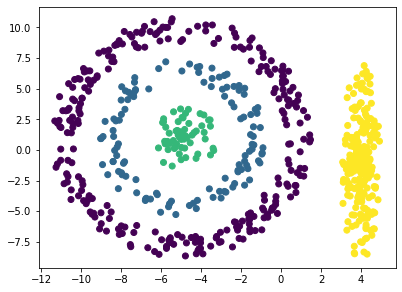

Time taken for CURE: 00:00:00.002


In [29]:
start:.z.t
show r5:.ml.clust.cure.cutk[dendcure;4]
end:string .z.t-start;
plt[`:scatter][;;`c pykw r5`clt]. d5;
plt[`:show][];
-1"Time taken for CURE: ",end;

### `.ml.clust.cure.predict`

Predictions are then made by passing in testing data points with the configuration dictionary returned above.

Here we generate a further 10 random points.

-1.906728 -4.675947 1.711169   -8.220073 2.611997  -1.627   -3.613198 -5.5429..
7.722212  -4.361587 -0.7884008 -3.2093   -3.824043 2.454529 5.087608  1.83103..


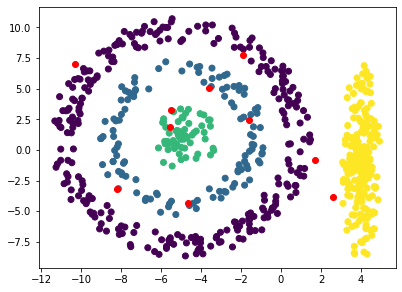

In [30]:
show d5tst:(-12+10?16.;-7.5+10?17.5)
plt[`:scatter][;;`c pykw r5`clt]. d5;
plt[`:scatter][;;`c pykw`r]. d5tst;
plt[`:show][];

0 1 0 1 3 1 1 2 0 2


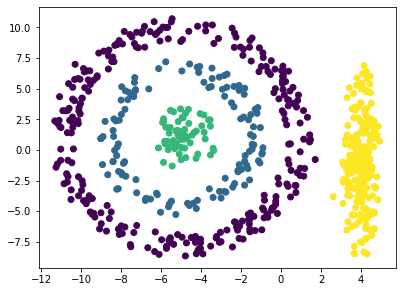

In [31]:
show r5pred:.ml.clust.cure.predict[d5tst;r5]
plt[`:scatter][;;`c pykw r5[`clt],r5pred]. d5,'d5tst;
plt[`:show][];

---

# Real-World Example

<a id='Chocolate-Bar-Ratings'></a>
## Chocolate Bar Ratings

In the example below, we look at the kaggle [Chocolate Bar Ratings dataset](https://www.kaggle.com/rtatman/chocolate-bar-ratings), compiled by Brady Brelinski, the founder of the Manhattan Chocolate Society.

The dataset contains around 1,800 expert ratings for individual chocolate bars collected between 2006-2017. There is a focus on plain dark chocolate, with information on the origin and cocoa content of each bar produced. We will look specifically at the features for **cocoa percentage**, **rating** and **review date** of each chocolate bar.

Each bar is rated using the below scale, from worst to best:
1. **Unpleasant** - mostly unpalatable
2. **Disappointing** - passable, but contains at least 1 significant flaw
3. **Satisfactory** to 3.75. **Praiseworthy** - well made, with special qualities
4. **Premium** - superior flavor development, character and style
5. **Elite** - transcending beyond the ordinary limits

Where ratings are based on 4 main factors: *flavor, texture, aftermelt* and *overall opinion*, with flavor being the most important.

The aim in this example is to detect any outliers contained in the dataset using the clustering library contained in the ML-Toolkit. Additonal utility functions have also been defined below.

In [32]:
\l automl/automl.q
.automl.loadfile`:init.q

Requirements for Keras models not satisfied. Keras and Tensorflow must be installed. Keras models will be excluded from model evaluation.
Requirements for PyTorch models not satisfied. Torch must be installed. PyTorch models will be excluded from model evaluation.


In [33]:
/ utils

\d .ml
mode:{$[98h~t:type x;i.mode_calc each flip x;99h~t;i.mode_calc each x;i.mode_calc x]}
i.mode_calc:{n?max n:count each group x}
describe_mode:{key[d]!update mode:value .ml.mode x from value d:.automl.prep.i.describe x}

### Load data

In the below cell, we load in the chocolate dataset and return the shape of the features of interest, namely `cocoa_pcnt`, `rating`, `review_dt`.

<div class="alert alert-danger">
The data loaded in below has been preprocessed prior to use in this notebook to remove punctuation characters, convert null `bean_typ characters to <i>"Unknown"</i> and change column names to those more appropriate for q.
</div>

In [34]:
-1"Full dataset:\n";
show 5#cocoa:("SSISSSIFF";(),",")0:`:../data/cocoa.csv

-1"\nRelevant columns:\n";
show 5#d:select cocoa_pcnt,rating,review_dt from cocoa

-1"\nRelevant column info:\n";
show .ml.describe_mode d

Full dataset:

company company_loc ref  bean_origin broad_bean_origin bean_typ review_dt coc..
-----------------------------------------------------------------------------..
AMorin  France      1876 AguaGrande  SaoTome           Unknown  2016      0.6..
AMorin  France      1676 Kpime       Togo              Unknown  2015      0.7..
AMorin  France      1676 Atsane      Togo              Unknown  2015      0.7..
AMorin  France      1680 Akata       Togo              Unknown  2015      0.7..
AMorin  France      1704 Quilla      Peru              Unknown  2015      0.7..

Relevant columns:

cocoa_pcnt rating review_dt
---------------------------
0.63       3.75   2016     
0.7        2.75   2015     
0.7        3      2015     
0.7        3.5    2015     
0.7        3.5    2015     

Relevant column info:

          | count unique mean      std        min   max   type    mode 
----------| -----------------------------------------------------------
cocoa_pcnt| 1795  45     0.7169833 0.0632

We can see that the majority of reviews were carried out in 2015, with most bars receiving a pretty average score of 3.5. The focus on dark chocolate is also apparent given that most bars selected contain around 70% cocoa mass.

### Prepare data

Given that the three features of interest vary in scales, it is important to standardize the data before passing it to a clustering algorithm. Below we apply the standard scaler function contained within the ML-Toolkit.

In [35]:
5#s:.ml.stdscaler d

cocoa_pcnt rating     review_dt
-------------------------------
-1.376022  1.180231   1.255692 
-0.2686652 -0.9121291 0.913975 
-0.2686652 -0.3890391 0.913975 
-0.2686652 0.6571409  0.913975 
-0.2686652 0.6571409  0.913975 


At this stage it is useful to visualize the data to see if any outliers are apparent.

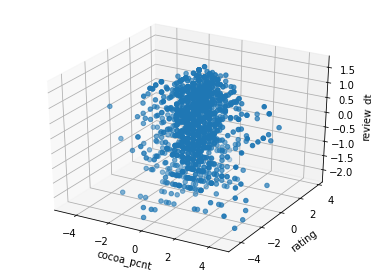

In [36]:
fig:plt[`:figure][];
.p.import[`mpl_toolkits.mplot3d]`:Axes3D;
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter]. data:value flip s;
ax[`:set_xlabel](sc:cols s)0;
ax[`:set_ylabel]sc 1;
ax[`:set_zlabel]sc 2;
plt[`:show][];

The plot makes clear that most data is clumped together in one obvious cluster, with a couple of sparse outliers present.

### Cluster data

It is now possible to apply clustering methods to the data. We have chosen to use the DBSCAN algorithm, contained within the ML-Toolkit, as this algorithm is commonly used in anomaly detection.

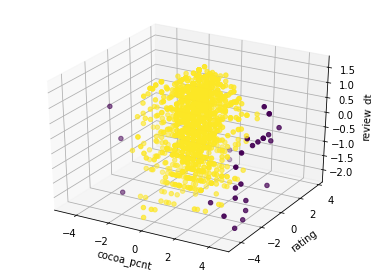


Time taken for DBSCAN: 00:00:00.113

Outliers:

cocoa_pcnt rating review_dt
---------------------------
0.7        5      2007     
0.7        5      2006     
1          1.75   2010     
1          1.5    2006     
1          1.5    2009     

Outliers info:

          | count unique mean      std       min   max   type    mode 
----------| ----------------------------------------------------------
cocoa_pcnt| 28    7      0.9178571 0.1772497 0.42  1f    numeric 1f   
rating    | 28    11     2.473214  0.9630663 1f    5f    numeric 1.5  
review_dt | 28    10     2010.607  3.166249  2006i 2016i numeric 2013i


In [37]:
/ cluster data
start:.z.t
rexample:.ml.clust.dbscan.fit[data;`e2dist;10;2]`clt
end:string .z.t-start

/ plot clusters
fig:plt[`:figure][];
ax:fig[`:add_subplot][111;`projection pykw"3d"];
ax[`:scatter][;;;`c pykw rexample]. data;
ax[`:set_xlabel]sc 0;
ax[`:set_ylabel]sc 1;
ax[`:set_zlabel]sc 2;
plt[`:show][];

-1"\nTime taken for DBSCAN: ",end;
-1"\nOutliers:\n";
show 5#outliers:d idx:where -1=rexample
-1"\nOutliers info:\n";
show .ml.describe_mode outliers

The algorithm has detected 31 outliers within the dataset. These have been grouped together into cluster `-1`.

Below we plot the distribution of each feature in the 31 outliers to see if any clear trends exist within the data.

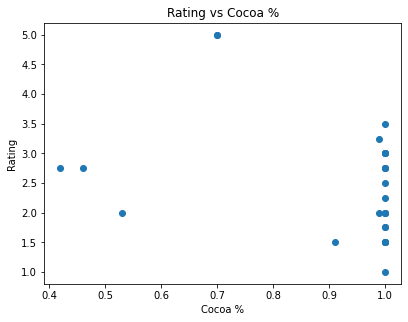

In [38]:
plt[`:scatter][outliers`cocoa_pcnt;outliers`rating];
plt[`:xlabel]["Cocoa %"];
plt[`:ylabel]["Rating"];
plt[`:title]["Rating vs Cocoa %"];
plt[`:show][];

The majority of outliers recieved pretty low ratings, ranging mainly from 1-3. The most prominent feature of the plots is the number of bars present with 100% cocoa content.

We can check this against the number of 100% bars in the entire dataset:

In [39]:
drkchoco:{-1 string[exec count i from x where cocoa_pcnt=1],
     " bars with 100% cocoa are contained in the original dataset";}

drkchoco each (cocoa;outliers);

20 bars with 100% cocoa are contained in the original dataset
20 bars with 100% cocoa are contained in the original dataset


All of the bars with 100% dark chocolate contained in the dataset appear in our outliers.

We can look specifically at the ratings and review date for those values:

In [40]:
\c 25 100
`rating xasc select from outliers where cocoa_pcnt=1

cocoa_pcnt rating review_dt
---------------------------
1          1      2008     
1          1.5    2006     
1          1.5    2009     
1          1.5    2012     
1          1.5    2010     
1          1.75   2010     
1          1.75   2013     
1          2      2014     
1          2      2008     
1          2      2007     
1          2.25   2013     
1          2.5    2013     
1          2.75   2013     
1          2.75   2013     
1          2.75   2016     
1          3      2013     
1          3      2008     
1          3      2015     
1          3      2015     
1          3.5    2013     


It looks as though the bars with higher cocoa percentage actually produce lower than average ratings as a whole compared to the other bars in the dataset.

---